# Intalling and importing dependincies

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ara-tweets-final-data/val.pkl
/kaggle/input/ara-tweets-final-data/train.pkl
/kaggle/input/ara-tweets-final-data/test.pkl
/kaggle/input/noto-color-emoji-font/NotoColorEmoji-Regular.ttf


In [ ]:
!pip install ar_wordcloud
!pip install arabic_reshaper
!pip install arabic-stopwords
!pip install tabulate
!pip install demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 9.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 2.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display
from ar_wordcloud import ArabicWordCloud
import re
import seaborn as sns
import emoji
import pickle
import arabicstopwords.arabicstopwords as ast
from collections import Counter



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
!pip install gdown

In [ ]:
from datasets import load_dataset

dataset = load_dataset("emotone_ar")

Generating train split:   0%|          | 0/10065 [00:00<?, ? examples/s]

Dataset emotone_ar downloaded and prepared to /root/.cache/huggingface/datasets/emotone_ar/default/0.0.0/36bfa7e8bdf640ccb3d5701933cfde2fa7051f22881cfab2962122771d32c430. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

# !!!! you need to import the data in a format like the output of the Preprocessing code

In [ ]:
file_path = '/kaggle/input/ara-tweets-final-data/train.pkl'
with open(file_path, 'rb') as file:
    train = pickle.load(file)
file_path = '/kaggle/input/ara-tweets-final-data/val.pkl'
with open(file_path, 'rb') as file:
    val = pickle.load(file)
file_path = '/kaggle/input/ara-tweets-final-data/test.pkl'
with open(file_path, 'rb') as file:
    test = pickle.load(file)

In [ ]:
dataset = pd.concat([train, val])

In [ ]:
df=dataset

In [ ]:
# Given label to emotion class mapping
label_to_class = {
    0: 'none',
    1: 'anger',
    2: 'joy',
    3: 'sadness',
    4: 'love',
    5: 'sympathy',
    6: 'surprise',
    7: 'fear'
}

# Dataset labels distrbution


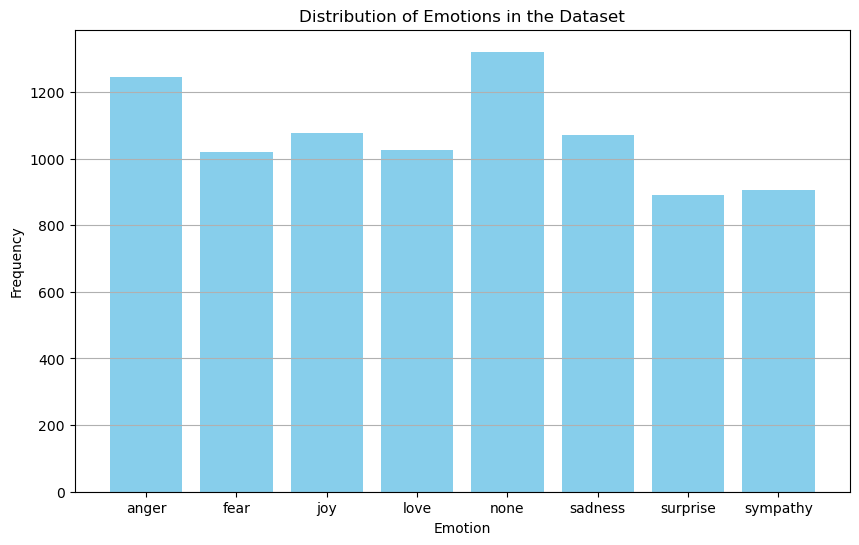

In [ ]:


# Count the frequency of each emotion
emotion_counts = df['label'].map(label_to_class).value_counts()

# Sort the emotions based on their numeric labels
emotion_counts = emotion_counts.sort_index()

# Plot the distribution of labels/emotions
plt.figure(figsize=(10, 6))
plt.bar(emotion_counts.index, emotion_counts.values, color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Distribution of Emotions in the Dataset')
plt.grid(axis='y')
plt.show()

In [ ]:
import demoji
import re
import pandas as pd

def extract_emojis(tweet):
    return demoji.findall(tweet)

def extract_emoticons(text):
    emoticon_pattern = r'(?::|;|=)(?:-)?(?:\)|\(|D|P)'
    emoticons = re.findall(emoticon_pattern, text)
    return emoticons

# Sample DataFrame with 'tweet' column containing the tweets


# Function to check if a tweet contains emojis or emoticons
def has_emoji_or_emoticon(text):
    emojis = extract_emojis(text)
    emoticons = extract_emoticons(text)
    return bool(emojis) or bool(emoticons)

# Check if each tweet contains emojis or emoticons
df['has_emoji_or_emoticon'] = df['tweet'].apply(has_emoji_or_emoticon)

# Analysis on emojis

## Distrbution of emojis vs no emojis samples


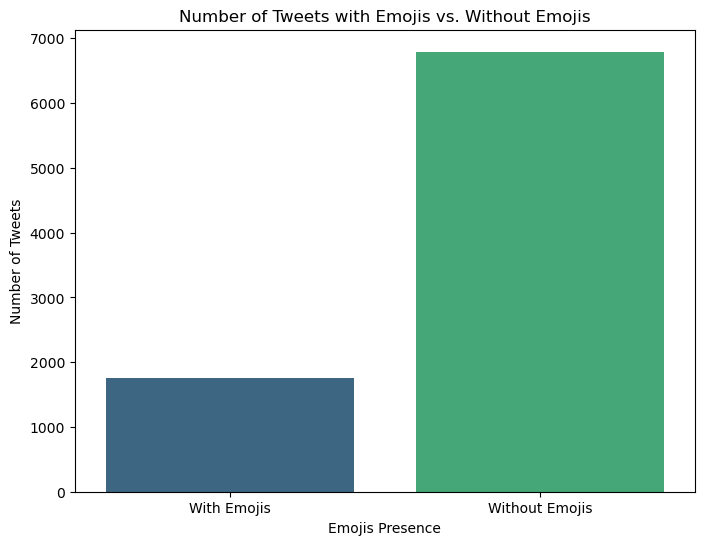

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame df with a column 'has_emoji_or_emoticon' representing tweets with emojis or emoticons
# num_tweets_with_emojis_or_emoticons = df['has_emoji_or_emoticon'].sum()
num_tweets_with_emojis_or_emoticons = df['has_emoji_or_emoticon'].sum()
# Generate the data for plotting
emojis_present = num_tweets_with_emojis_or_emoticons
emojis_absent = len(df) - num_tweets_with_emojis_or_emoticons

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['With Emojis', 'Without Emojis'], y=[emojis_present, emojis_absent], palette='viridis')
plt.xlabel('Emojis Presence')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets with Emojis vs. Without Emojis')
plt.show()


<font size=4> we can see here that the majority of the data has no emojis in it

## The distrbution of the most used emojis in the data

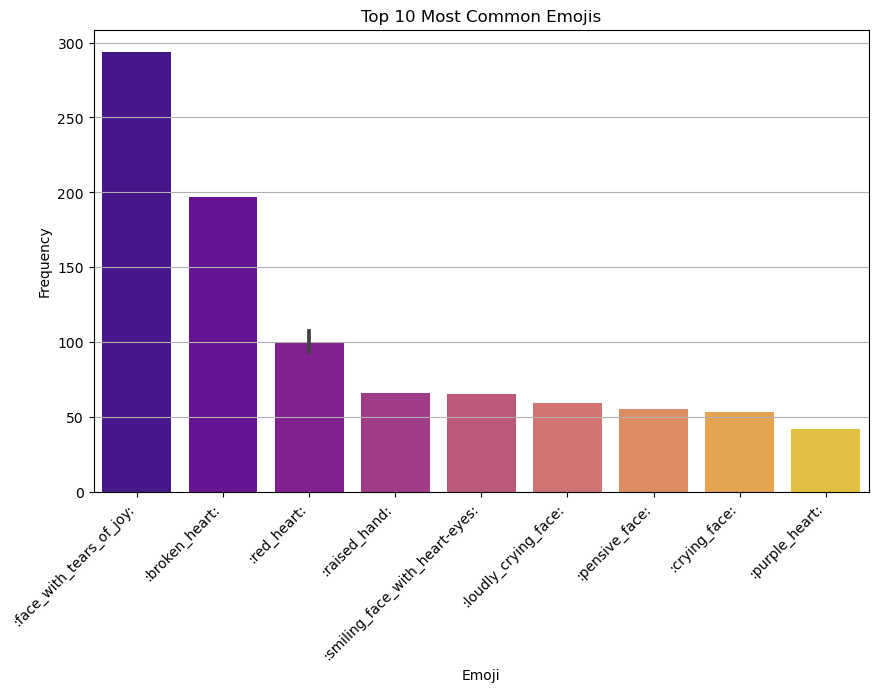

{'😔', '❤️', '😂', '❤', '✋', '😍', '😭', '💜', '💔', '😢'}


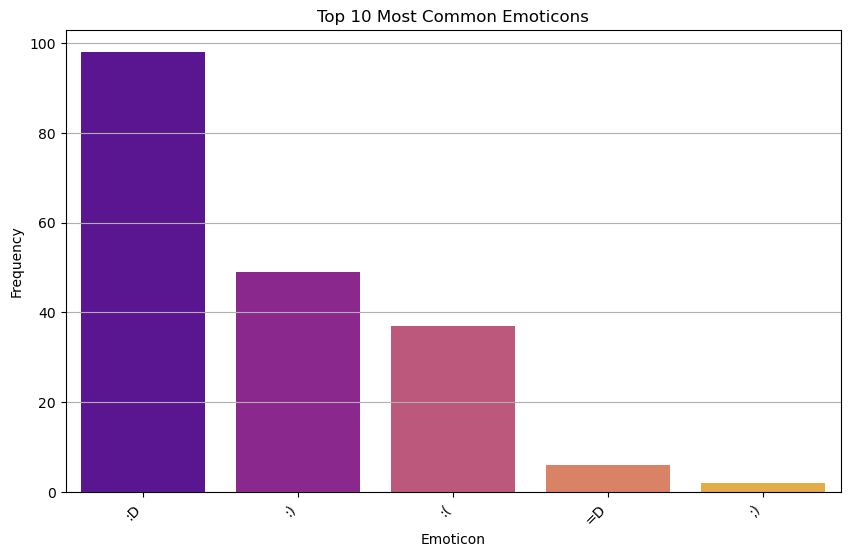

In [ ]:

# Extract all emojis and emoticons from the DataFrame
all_emojis = []
all_emoticons = []

for text in df['tweet']:
    emojis = extract_emojis(text)
    emoticons = extract_emoticons(text)
    all_emojis.extend(emojis)
    all_emoticons.extend(emoticons)

# Count the occurrences of each emoji and emoticon
emoji_counts = pd.Series(all_emojis).value_counts()
emoticon_counts = pd.Series(all_emoticons).value_counts()

# Plot the most common emojis

# Convert emojis to Unicode representation
emoji_labels = [emoji.demojize(e) for e in emoji_counts.index[:10]]

plt.figure(figsize=(10, 6))
sns.barplot(x=emoji_labels, y=emoji_counts.values[:10], palette='plasma')
plt.xlabel('Emoji')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Emojis')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


print(set(emoji_counts.index[:10]))

# Plot the most common emoticons
plt.figure(figsize=(10, 6))
sns.barplot(x=emoticon_counts.index[:10], y=emoticon_counts.values[:10], palette='plasma')
plt.xlabel('Emoticon')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Emoticons')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

## The distrbution of emoji usage in respect to the label

Label: none, Number of Tweets with Emojis: 266
Most used emojis or emoticons:
------------------------------
Label: anger, Number of Tweets with Emojis: 55
Most used emojis or emoticons:
------------------------------
Label: joy, Number of Tweets with Emojis: 233
Most used emojis or emoticons:
------------------------------
Label: sadness, Number of Tweets with Emojis: 195
Most used emojis or emoticons:
------------------------------
Label: love, Number of Tweets with Emojis: 343
Most used emojis or emoticons:
------------------------------
Label: sympathy, Number of Tweets with Emojis: 195
Most used emojis or emoticons:
------------------------------
Label: surprise, Number of Tweets with Emojis: 155
Most used emojis or emoticons:
------------------------------
Label: fear, Number of Tweets with Emojis: 320
Most used emojis or emoticons:
------------------------------


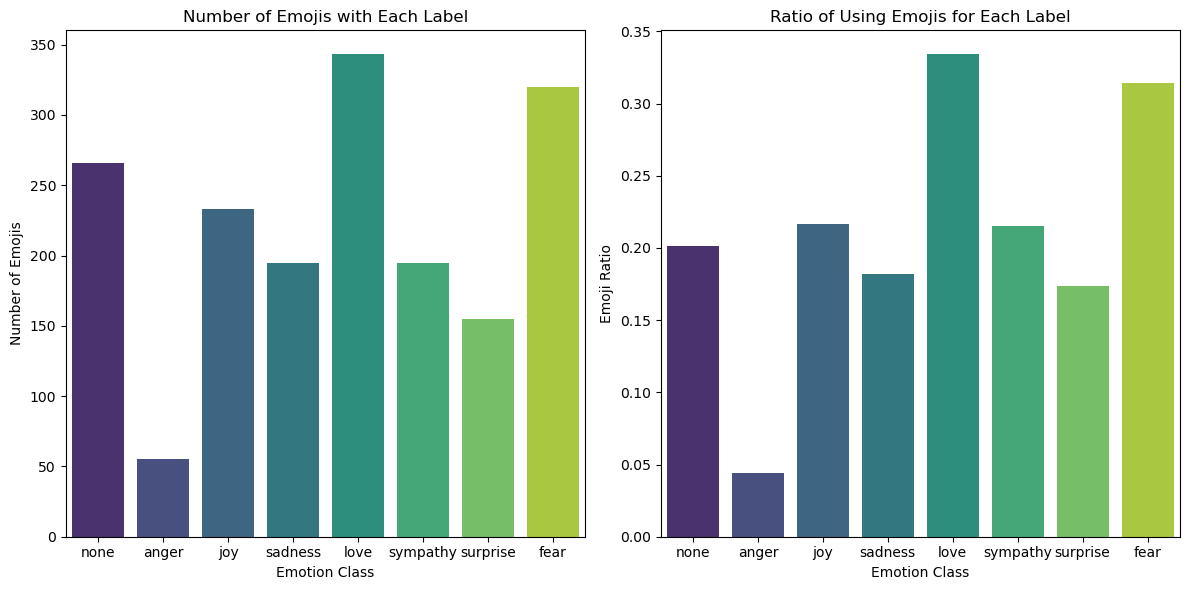

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import emoji

# Assuming you have a DataFrame df with columns 'label' and 'text' representing the labels and tweet texts

# Given label to emotion class mapping
label_to_class = {
    0: 'none',
    1: 'anger',
    2: 'joy',
    3: 'sadness',
    4: 'love',
    5: 'sympathy',
    6: 'surprise',
    7: 'fear'
}

# Group tweets by their labels and count the number of tweets with emojis for each label
emoji_counts_by_label = df.groupby('label')['has_emoji_or_emoticon'].sum()

# Print the most used emojis or emoticons with each label
for label, count in emoji_counts_by_label.items():
    tweets_with_emoji = df[(df['label'] == label) & (df['has_emoji_or_emoticon'] == 1)]
    emoji_counts = emoji.emoji_count(' '.join(tweets_with_emoji['tweet']))
    if isinstance(emoji_counts, int):
        emoji_counts = {}  # Handle the case when no emojis are present
    most_used_emojis = sorted(emoji_counts.items(), key=lambda x: x[1], reverse=True)[:5]
    print(f"Label: {label_to_class[label]}, Number of Tweets with Emojis: {count}")
    print("Most used emojis or emoticons:")
    for emoji_unicode, emoji_count in most_used_emojis:
        print(f"{emoji.emojize(emoji_unicode)}: {emoji_count}")
    print("-" * 30)

# Calculate the ratio of using emojis or not for each label
emoji_ratio_by_label = emoji_counts_by_label / df['label'].value_counts()

# Plot the number of emojis with each label and the ratio of using emojis or not for each label
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=[label_to_class[label] for label in emoji_counts_by_label.index], y=emoji_counts_by_label.values, palette='viridis')
plt.xlabel('Emotion Class')
plt.ylabel('Number of Emojis')
plt.title('Number of Emojis with Each Label')

plt.subplot(1, 2, 2)
sns.barplot(x=[label_to_class[label] for label in emoji_ratio_by_label.index], y=emoji_ratio_by_label.values, palette='viridis')
plt.xlabel('Emotion Class')
plt.ylabel('Emoji Ratio')
plt.title('Ratio of Using Emojis for Each Label')

plt.tight_layout()
plt.show()


<font size="4">We can see here that emoji usage clearly corrleates with certain labels as:
    
<font size="4">The anger label has very low emoji usage with it with a ratio lower than 5% ,Suggesting a relation between the emotion of "anger" and low emoji usage.
    
<font size="4">On the other hand we have label like "love" emotion which has an emoji usage of about 34% suggesting a big correlation between the emotion of love  and usage of emojis.
    
<font size="4">we also see that the label "None" has a significant amount of tweets that has emojis in them which is a bit counterintuitive as if we assume that the none class dosent repesent an emotiona and emojis by defination are representations of emotions

## The most used emojis per label

In [ ]:

# Group tweets by labels
grouped = df.groupby("label")

# Dictionary to store the results
results = {}

# Calculate frequency of emojis and emoticons for each label category
for label, group in grouped:
    class_name = label_to_class[label]
    emojis_count = {}
    emoticons_count = {}
    for tweet in group["tweet"]:
        emojis = extract_emojis(tweet)
        emoticons = extract_emoticons(tweet)
        for emoji in emojis:
            emojis_count[emoji] = emojis_count.get(emoji, 0) + 1
        for emoticon in emoticons:
            emoticons_count[emoticon] = emoticons_count.get(emoticon, 0) + 1

    results[class_name] = {
        "emojis": sorted(emojis_count.items(), key=lambda x: x[1], reverse=True),
        "emoticons": sorted(emoticons_count.items(), key=lambda x: x[1], reverse=True),
    }

# Display the results
for class_name, counts in results.items():
    print(f"Class: {class_name}")
    print("Most used emojis:")
    for emoji, count in counts["emojis"][:5]:  # You can adjust the number of top emojis to display
        print(f"{emoji}: {count}")
    print("Most used emoticons:")
    for emoticon, count in counts["emoticons"][:5]:  # You can adjust the number of top emoticons to display
        print(f"{emoticon}: {count}")
    print("\n")

Class: none
Most used emojis:
😂: 113
😅: 12
✋: 10
😄: 9
😊: 8
Most used emoticons:
:D: 23
:): 13
=D: 4


Class: anger
Most used emojis:
✋: 6
😂: 5
✌: 3
😏: 2
😡: 2
Most used emoticons:
:D: 7
:): 4
:(: 4
=D: 1


Class: joy
Most used emojis:
😂: 37
😍: 22
❤️: 21
♥: 20
❤: 17
Most used emoticons:
:D: 45
:): 16
;): 1
:(: 1


Class: sadness
Most used emojis:
💔: 41
😔: 19
😂: 16
😢: 14
😭: 10
Most used emoticons:
:(: 14
:D: 6
:): 4
=D: 1


Class: love
Most used emojis:
❤️: 55
❤: 51
💜: 32
😍: 32
💕: 28
Most used emoticons:
:): 3
:(: 1
;): 1


Class: sympathy
Most used emojis:
💔: 51
😢: 20
❤️: 18
❤: 12
😔: 12
Most used emoticons:
:(: 5
:): 2


Class: surprise
Most used emojis:
😂: 46
🤔: 9
💔: 7
😳: 6
😏: 6
Most used emoticons:
:D: 16
:(: 3
:): 2


Class: fear
Most used emojis:
💔: 79
😂: 67
😭: 39
😔: 21
😢: 15
Most used emoticons:
:(: 9
:): 5
:D: 1




<font size=4>Here when we look at the most used emojis with each label we see emojis like 💔,😢 used with sympathy expectedly  but we also see emojis like 😂 being the most used with "none" ,second most used emoji with "fear",third most used with sadness which is especially counterintuitive as 😂 is the most used with joy expectedly ,this inconsistent usage of emojis might lead to problems in the classifcation later.

# After data cleaning

In [ ]:
! gdown "1Fs0PTy_xPsoX5bg4QTCrX6JAaQCHRzis"
! gdown "1JLa-ELhUskQINi0syf3YJWBX8jcCXdn4"

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Downloading...
From: https://drive.google.com/uc?id=1Fs0PTy_xPsoX5bg4QTCrX6JAaQCHRzis
To: /kaggle/working/train.pkl
100%|███████████████████████████████████████| 4.09M/4.09M [00:00<00:00, 134MB/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Downloading...
From: https://drive.google.com/uc?id=1JLa-ELhUskQINi0syf3YJWBX8jcCXdn4
To: /kaggle/working/test.pkl
100%|███████████████████████████████████

In [ ]:
#df['without_olympics'] = df['Light Stemming'].str.replace("اوليمبياد", "مسابقة")

In [ ]:
'''import random

replacement_words = ["", "رياضة", "مسابقة", "منافسة","لعبة"]
# Replace "اوليمبياد" with a random replacement word
og_train['without_olympics'] = og_train['Light Stemming'].apply(lambda x: random.choice(replacement_words) if "اوليمبياد" in x else x)'''

In [ ]:
stopwords_list = ast.stopwords_list()

#negation_prohibition_words = ["ليس", "لا", "ما", "لم", "لن"]
stopwords_list = [word for word in stopwords_list if word not in negation_prohibition_words]
stopwords_list.extend(["دي","اﻻ", "ده", "انا","الى","انت","اللى",
                       "ان","ما","يا","يلا","دا","مين","دول","دم","حد","من","عن","على","علشان","أني","وأنا","الل","كده"
                       ,"يعني","احنا","ايه","اللي","الي","اي","الا","وانا","ال"
                       ,"او","حتي","اني","لان","انه","انك","اذا","كنت","اول","زي","اخر","احد","ليس","اخر","اول","بقي","يكون","كانت","وانت","وهي","وانتم","وانتن","وهو","هه","كده","كدا","واحده","ليه","وان","وكان","ويكون"," لا","لا "," لا ","اول","الا"])


## The distrbution of stopwords

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


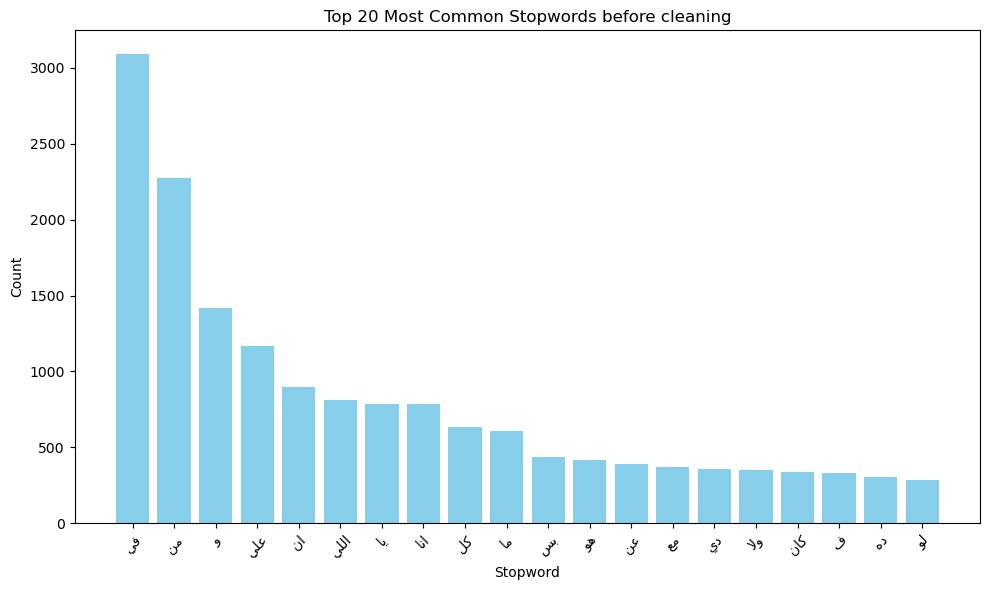

In [ ]:
# List of stopwords cleaned from the cleaned_data
import nltk
nltk.download('punkt')  # Download the necessary data for tokenization

from nltk.stem import ISRIStemmer
isri_stemmer = ISRIStemmer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
#   Applies stemming to the input Arabic text using the ISRI Arabic stemmer.

def light_stemming(text):
    s=' '
    x = w_tokenizer.tokenize(text)
    return s.join([isri_stemmer.norm(w,num=3)for w in x])
Data=pd.DataFrame()
Data["tweet"] = df['tweet'].apply(light_stemming)

# Count stopwords in each tweet
stopword_counts = Counter()

for index, row in Data.iterrows():
    tweet = row["tweet"]
    words = tweet.split()  # Split tweet into words
    stopwords_in_tweet = [word for word in words if word in stopwords_list]
    stopword_counts.update(stopwords_in_tweet)

# Get the most common stopwords
num_common_stopwords = 20  # Number of most common stopwords to plot
most_common_stopwords = stopword_counts.most_common(num_common_stopwords)

# Prepare data for plotting
stopwords, counts = zip(*most_common_stopwords)

# Reshape stopwords using arabic_reshaper and get_display
reshaped_stopwords = [get_display(arabic_reshaper.reshape(word)) for word in stopwords]

# Plot the most common stopwords
plt.figure(figsize=(10, 6))
plt.bar(reshaped_stopwords, counts, color='skyblue')
plt.xlabel("Stopword")
plt.ylabel("Count")
plt.title(f"Top {num_common_stopwords} Most Common Stopwords before cleaning")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:

def clean_text(text):

    # Tokenize the input text
    words = text.split()

    # Clean the text by removing stop words
    cleaned_words = [word for word in words if word not in stopwords_list]

    # Join the cleaned words back into a cleaned text
    cleaned_text = ' '.join(cleaned_words)

    return cleaned_text


# Apply the clean_text function to the 'text_column' and create a new cleaned column
train['Light Stemming'] = train['Light Stemming'].apply(clean_text)
test['Light Stemming'] = test['Light Stemming'].apply(clean_text)
val['Light Stemming'] = val['Light Stemming'].apply(clean_text)



In [ ]:
with open('/kaggle/working/train_final.pkl', 'wb') as f:
    pickle.dump(train, f)

with open('/kaggle/working/test_final.pkl', 'wb') as f:
    pickle.dump(test, f)

with open('/kaggle/working/val_final.pkl', 'wb') as f:
    pickle.dump(val, f)


## Word distribution over the dataset

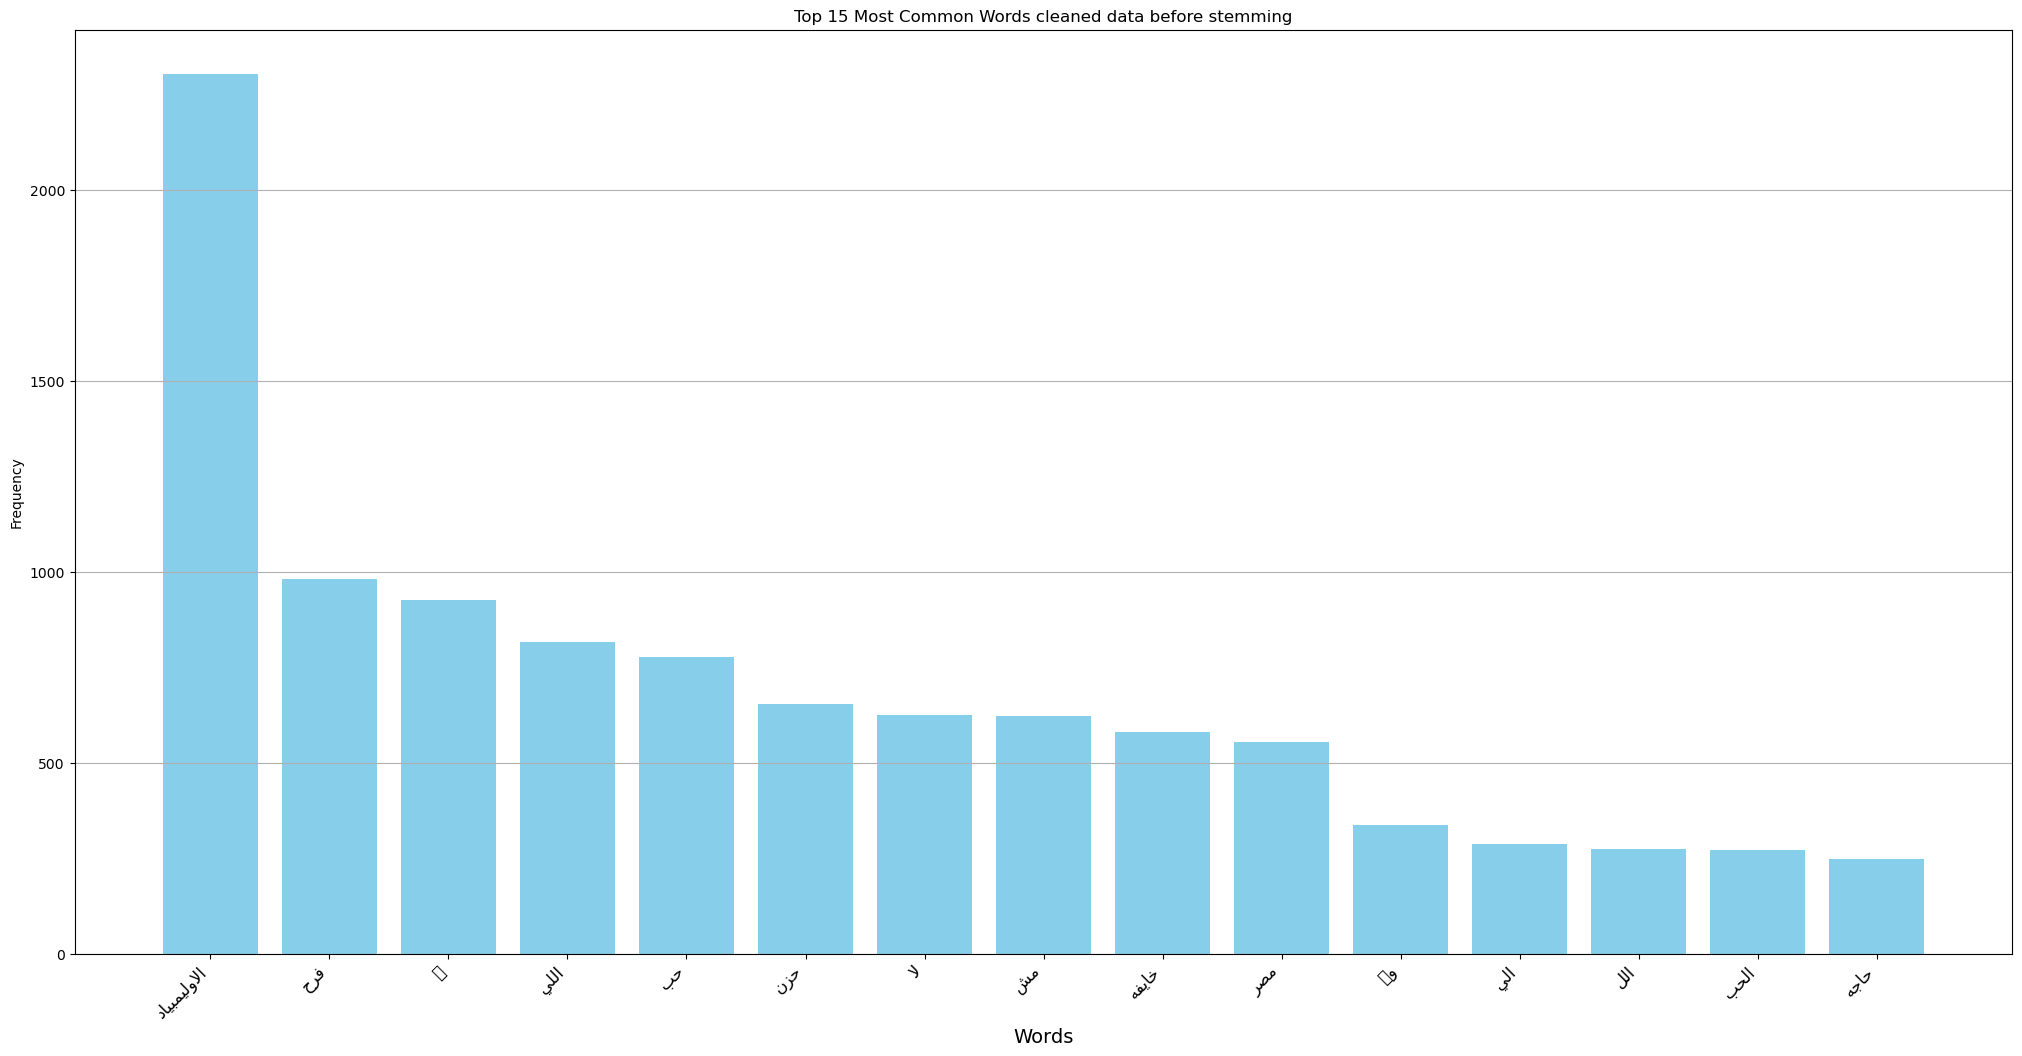

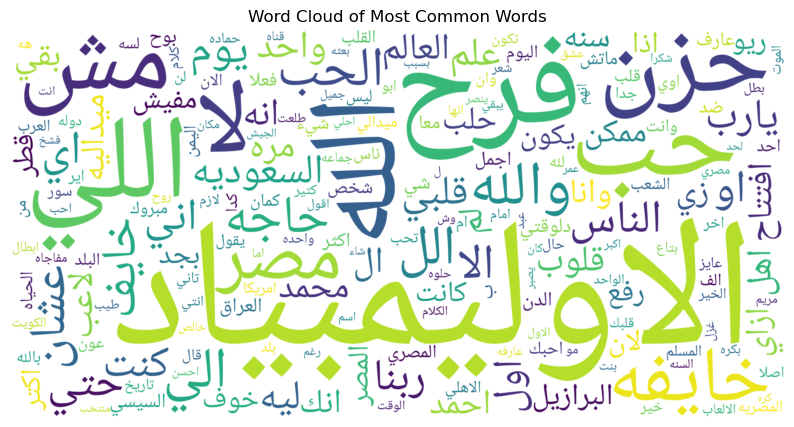

In [ ]:

df['processed_tweet'] = df['Light Stemming']

# Tokenize the tweets and create a list of all words
all_words = ' '.join(df['processed_tweet']).split(" ")

# Calculate word frequencies
word_freq = Counter(all_words)

# Get the most common words and their frequencies (adjust 'n' to show more or fewer words)
n = 15
most_common_words = word_freq.most_common(n)

# Plot the most common words
plt.figure(figsize=(25, 12))
plt.bar([get_display(arabic_reshaper.reshape(word)) for word, freq in most_common_words], [freq for word, freq in most_common_words], color='skyblue')
plt.xlabel('Words', fontsize=14)  # Increase font size here
plt.ylabel('Frequency')
plt.title(f'Top {n} Most Common Words cleaned data before stemming')
plt.xticks(rotation=45, ha='right', fontsize=12)  # Increase font size and add rotation
plt.grid(axis='y')
plt.show()
# Create a word cloud to visualize the most common words


wordcloud = ArabicWordCloud(width=3200, height=1600, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()


<font size=4>From the plot above and word cloud we can see that the most common word in the word (الاولمبياد)(olympics) which is because a segnifcant part of this data was colleced around the time of the 2016 olympics, the words (فرح,حب,حزن)(sad, love, happy)are also prevalent in the data with high concentration as when people express emotion use these words.  

## word distrbution after stemming

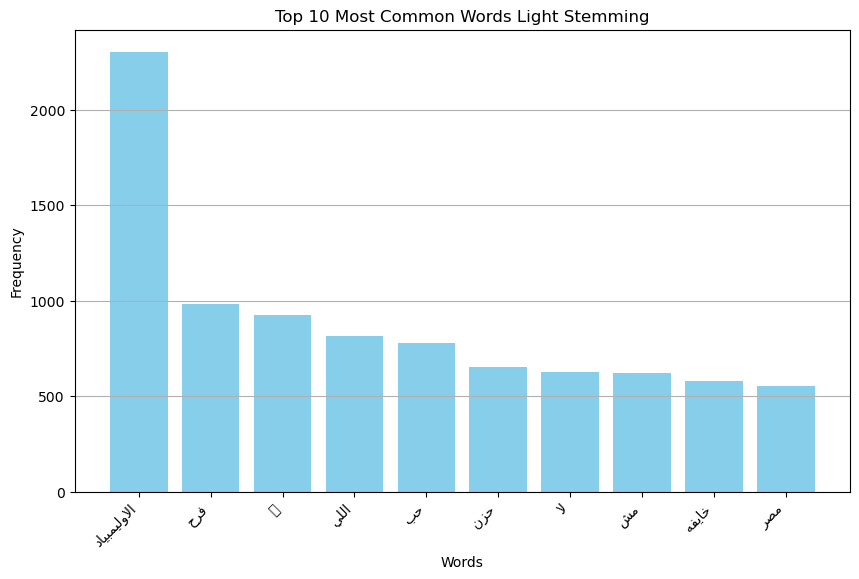

In [ ]:


df['processed_tweet'] = df['Light Stemming']

# Tokenize the tweets and create a list of all words
all_words = ' '.join(df['processed_tweet']).split()

# Calculate word frequencies
word_freq = Counter(all_words)

# Get the most common words and their frequencies (adjust 'n' to show more or fewer words)
n = 10
most_common_words = word_freq.most_common(n)

# Plot the most common words
plt.figure(figsize=(10, 6))
plt.bar([get_display(arabic_reshaper.reshape(word)) for word, freq in most_common_words], [freq for word, freq in most_common_words], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {n} Most Common Words Light Stemming')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


## word distrbution after root stemming for comarsion

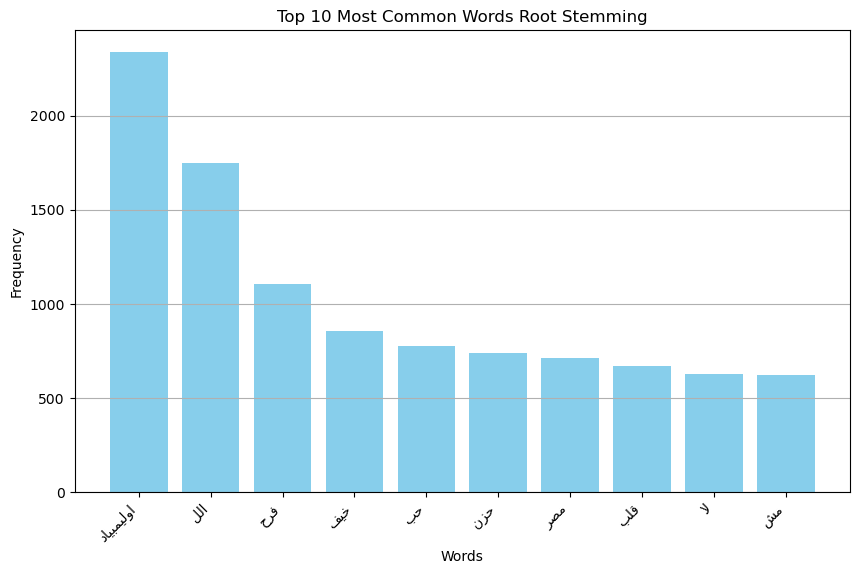

In [ ]:


df['processed_tweet'] = df['Root Stemming']

# Tokenize the tweets and create a list of all words
all_words = ' '.join(df['processed_tweet']).split()

# Calculate word frequencies
word_freq = Counter(all_words)

# Get the most common words and their frequencies (adjust 'n' to show more or fewer words)
n = 10
most_common_words = word_freq.most_common(n)

# Plot the most common words
plt.figure(figsize=(10, 6))
plt.bar([get_display(arabic_reshaper.reshape(word)) for word, freq in most_common_words], [freq for word, freq in most_common_words], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {n} Most Common Words Root Stemming')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Create a word cloud to visualize the most common words



## word distribution per label

/tmp/ipykernel_32/879683635.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([get_display(arabic_reshaper.reshape(word)) for word in words], rotation=45, ha='right')
/tmp/ipykernel_32/879683635.py:31: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


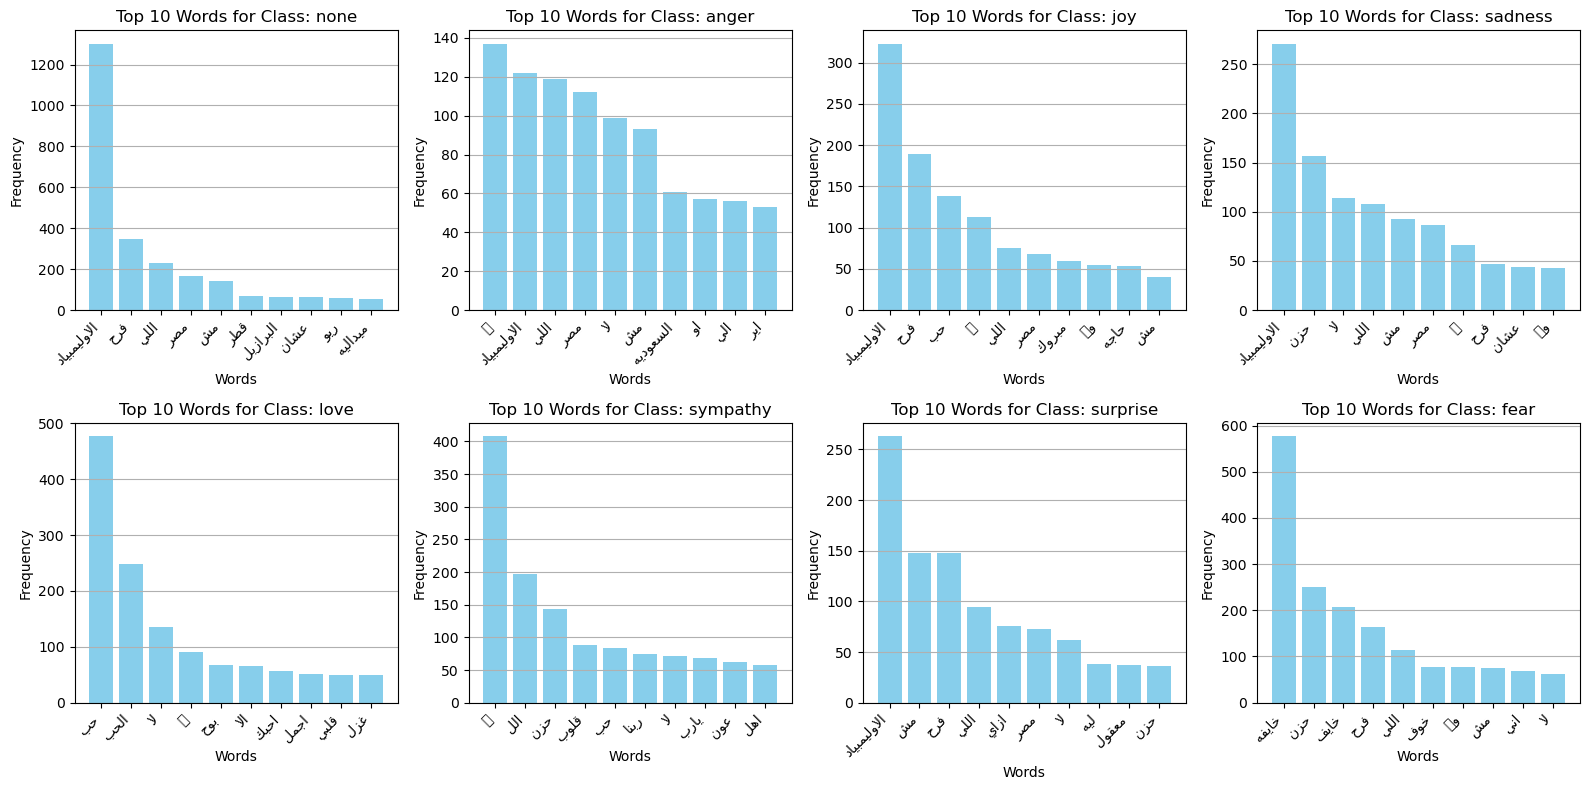

In [ ]:
# cleaned_data	Light Stemming

# Function to tokenize the tweets and create a list of all words
def tokenize_tweets(tweet_series):
    all_words = ' '.join(tweet_series).split()
    return all_words

# Calculate word frequencies for each label category
grouped = df.groupby("label")
word_freq_by_label = {}

for label, group in grouped:
    all_words = tokenize_tweets(group['Light Stemming'])
    word_freq = Counter(all_words)
    word_freq_by_label[label] = word_freq

# Plot the most common words for each label category
plt.figure(figsize=(16, 8))

for i, (label, word_freq) in enumerate(word_freq_by_label.items()):
    most_common_words = word_freq.most_common(10)  # Adjust 'n' to show more or fewer words
    words, frequencies = zip(*most_common_words)
    ax = plt.subplot(2, 4, i + 1)
    ax.bar([get_display(arabic_reshaper.reshape(word)) for word in words], frequencies, color='skyblue')
    ax.set_xlabel('Words')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Top 10 Words for Class: {label_to_class[label]}')
    ax.set_xticklabels([get_display(arabic_reshaper.reshape(word)) for word in words], rotation=45, ha='right')
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

<font size=4>From the figures above we can see that the labels (anger,joy,sadness,suprise,none) have the word (الاولمبياد)(olympics) as the most or second most used word which is to be expected because people use these emotion when they talk about sports as engagign with sports is mostly emotional or when they say something descriptive or neutral

<font size=4> When looking at labels like love,fear and sympathy we see that the word olympics isnt prevalent as before because these emotions are not associated with sports insted they have words that are associated with the emotion it self be the most common words


## Tweets length distribution over the all data

Number of samples with 0 words: 4
Number of samples with 1 words: 77
Number of samples with 2 words: 220
Number of samples with 3 words: 362
Number of samples with 4 words: 440
Number of samples with 5 words: 495


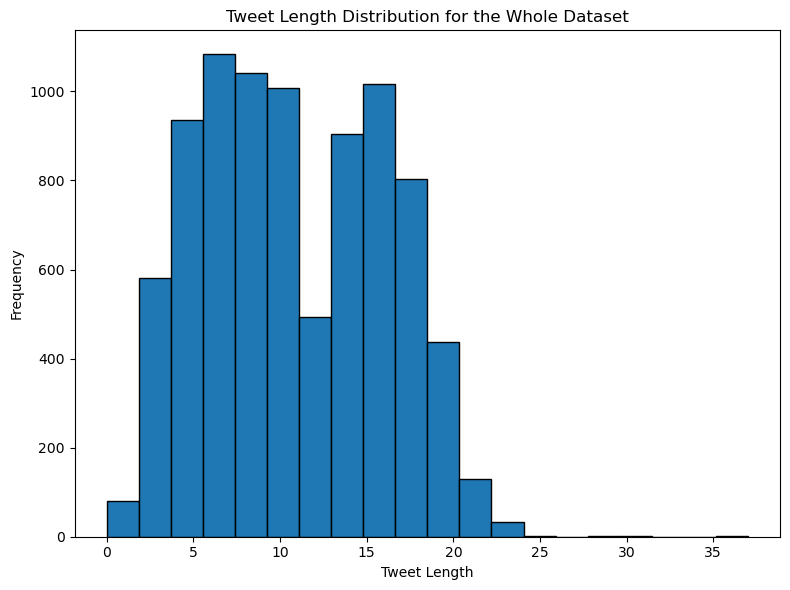

In [ ]:
import matplotlib.pyplot as plt

label_to_class = {
    0: 'none',
    1: 'anger',
    2: 'joy',
    3: 'sadness',
    4: 'love',
    5: 'sympathy',
    6: 'surprise',
    7: 'fear'
}

# cleaned_data    Light Stemming    Root Stemming
# Function to calculate the length of a tweet
def tweet_length(text):
    words = text.split()  # Split the text by spaces
    return len(words)  # Return the number of words

# Calculate the length of each tweet
df['tweet_length'] = df['Light Stemming'].apply(tweet_length)

# Count the number of samples for each specified tweet length
length_counts = df['tweet_length'].value_counts().sort_index()

# Print the number of samples for each specified tweet length
for length in range(6):
    count = length_counts.get(length, 0)
    print(f"Number of samples with {length} words: {count}")

# Create a single plot for the whole dataset
plt.figure(figsize=(8, 6))

all_tweet_lengths = df['tweet_length']
plt.hist(all_tweet_lengths, bins=20, edgecolor='black')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Tweet Length Distribution for the Whole Dataset')

plt.tight_layout()
plt.show()


<font size=4> we can see here that there isnt a big variability of the tweets lengths  

## Tweets length distribution per label

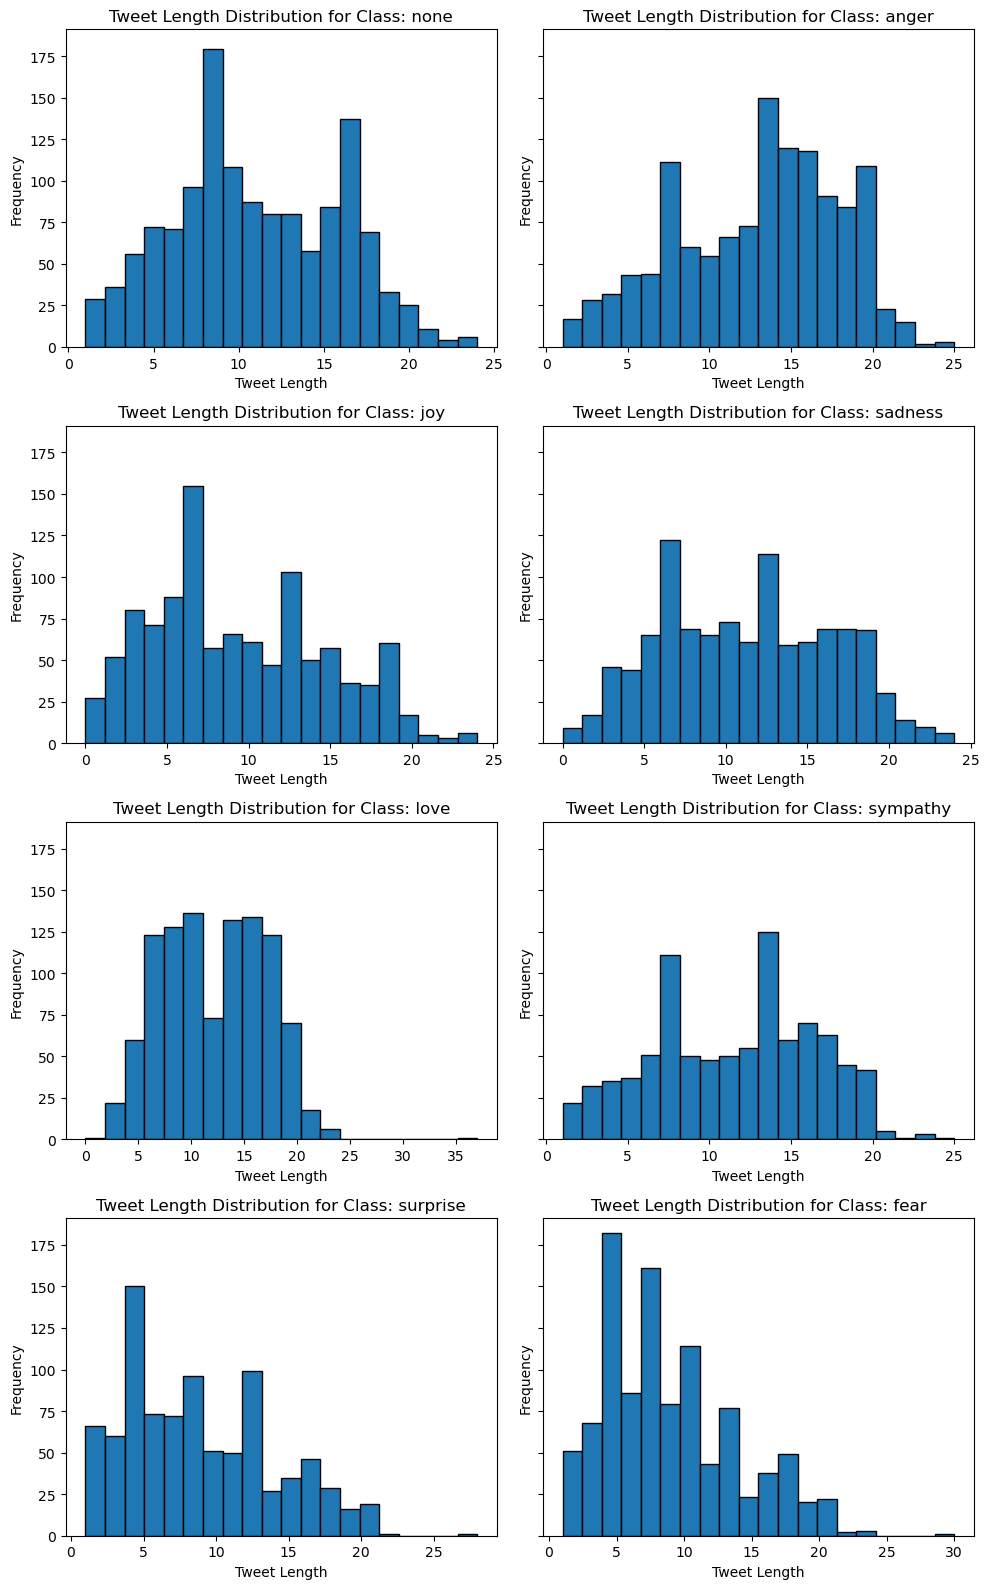

In [ ]:

label_to_class = {
    0: 'none',
    1: 'anger',
    2: 'joy',
    3: 'sadness',
    4: 'love',
    5: 'sympathy',
    6: 'surprise',
    7: 'fear'
}
# cleaned_data	Light Stemming	Root Stemming
#Function to calculate the length of a tweet
def tweet_length(text):
    words = text.split()  # Split the text by spaces
    return len(words)  # Return the number of words


# Calculate the length of each tweet
df['tweet_length'] = df['Light Stemming'].apply(tweet_length)

#Group tweets by labels
grouped = df.groupby("label")

# Create 4x2 grid of plots for tweet lengths for each class
fig, axes = plt.subplots(4, 2, figsize=(10, 16), sharey=True)

# Flatten the axes array to access each subplot
axes = axes.flatten()

for i, (label, group) in enumerate(grouped):
    class_name = label_to_class[label]
    tweet_lengths = group['tweet_length']

    axes[i].hist(tweet_lengths, bins=20, edgecolor='black')
    axes[i].set_xlabel('Tweet Length')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Tweet Length Distribution for Class: {class_name}')

# Remove any empty subplots
for i in range(len(grouped), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()





<font size=4>from the figure above we can see taht the distrbution of most of teh lables is somewhat similar, with classes like fear and suprise tending to be shorter

Statistics for Class none:
  Average tweet length: 11.01
  Minimum tweet length: 1.0
  Maximum tweet length: 24.0

Statistics for Class anger:
  Average tweet length: 12.92
  Minimum tweet length: 1.0
  Maximum tweet length: 25.0

Statistics for Class joy:
  Average tweet length: 9.32
  Minimum tweet length: 0.0
  Maximum tweet length: 24.0

Statistics for Class sadness:
  Average tweet length: 11.16
  Minimum tweet length: 0.0
  Maximum tweet length: 24.0

Statistics for Class love:
  Average tweet length: 12.15
  Minimum tweet length: 0.0
  Maximum tweet length: 37.0

Statistics for Class sympathy:
  Average tweet length: 11.44
  Minimum tweet length: 1.0
  Maximum tweet length: 25.0

Statistics for Class surprise:
  Average tweet length: 8.91
  Minimum tweet length: 1.0
  Maximum tweet length: 28.0

Statistics for Class fear:
  Average tweet length: 8.91
  Minimum tweet length: 1.0
  Maximum tweet length: 30.0

Statistics for the Whole Data:
  Average tweet length: 10.81
  Minimum t

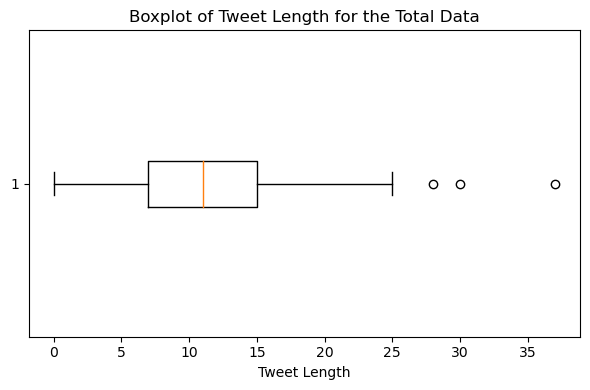

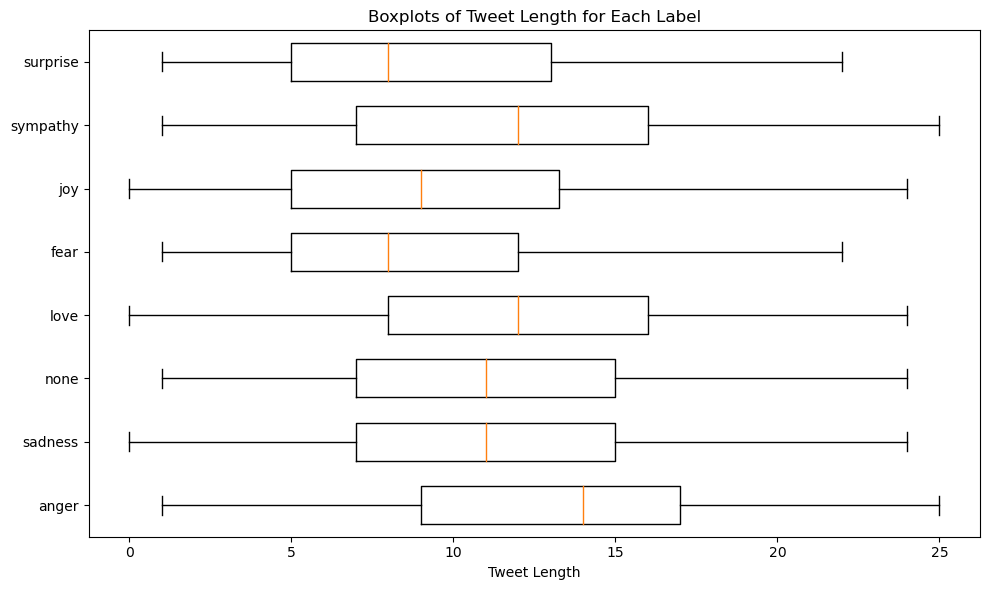

In [ ]:
# cleaned_data    Light Stemming    Root Stemming
# Group tweets by labels
grouped = df.groupby("label")

# Calculate the average, minimum, and maximum tweet length for each label
stats_by_label = grouped['tweet_length'].agg(['mean', 'min', 'max'])

# Print the average, minimum, and maximum tweet length for each label
for label, stats in stats_by_label.iterrows():
    class_name = label_to_class[label]
    avg_length = stats['mean']
    min_length = stats['min']
    max_length = stats['max']
    print(f"Statistics for Class {class_name}:")
    print(f"  Average tweet length: {avg_length:.2f}")
    print(f"  Minimum tweet length: {min_length}")
    print(f"  Maximum tweet length: {max_length}\n")

# Calculate the statistics for the whole data
total_stats = df['tweet_length'].agg(['mean', 'min', 'max'])
print("Statistics for the Whole Data:")
print(f"  Average tweet length: {total_stats['mean']:.2f}")
print(f"  Minimum tweet length: {total_stats['min']}")
print(f"  Maximum tweet length: {total_stats['max']}\n")

# ... (Rest of your existing code)

# Create boxplot for the length of the total data
plt.figure(figsize=(6, 4))
plt.boxplot(df['tweet_length'], vert=False)
plt.xlabel('Tweet Length')
plt.title('Boxplot of Tweet Length for the Total Data')
plt.tight_layout()
plt.show()

# Create boxplots for the length of each label
plt.figure(figsize=(10, 6))
labels = df['label'].unique()
label_names = [label_to_class[label] for label in labels]

for i, label in enumerate(labels):
    label_name = label_names[i]
    label_data = df[df['label'] == label]['tweet_length']
    plt.boxplot(label_data, positions=[i], widths=0.6, showfliers=False, vert=False)
    #plt.text(i, label_data.median(), f"{label_name}\n({label_data.median():.2f})", ha='center', va='center')

plt.yticks(range(len(labels)), label_names)
plt.xlabel('Tweet Length')
plt.title('Boxplots of Tweet Length for Each Label')

plt.tight_layout()
plt.show()


## Displaying tweets with a specfic lengths

In [ ]:
# Function to print example short tweets for each label
def print_short_tweets(label, group):
    class_name = label_to_class[label]
    short_tweets = group[group['tweet_length'] < 6]['cleaned_data']  # Filter tweets with length less than 5
    #short_tweets = group[group['tweet_length'] < 6]['tweet']
    print(f"Examples of short tweets for Class: {class_name}")

    # Print examples of different lengths
    lengths = [5, 4, 3, 2, 1]
    for length in lengths:
        length_tweets = short_tweets[short_tweets.apply(lambda tweet: len(tweet.split()) == length)]
        if len(length_tweets) > 0:
            print(f"{length}-word tweets:")
            for tweet in length_tweets.sample(min(2, len(length_tweets))):
                print("-", tweet)

    print("\n")

# Calculate the length of each tweet
df['tweet_length'] = df['cleaned_data'].apply(tweet_length)

# Group tweets by labels
grouped = df.groupby("label")


# Print examples of short tweets for each class
for label, group in grouped:
    print_short_tweets(label, group)


Examples of short tweets for Class: none
5-word tweets:
- مفيش بث مباشر لافتتاح الاوليمبياد
- اكتر لعبه ممتعه الاوليمبياد الترامبولين
4-word tweets:
- صور السيسي اللاعيبه الاوليمبياد
- عايزين جدول مباريات الاوليمبياد
3-word tweets:
- الاوليمبياد افتتحوها لسه    
- الجمهور المصري الاوليمبياد
2-word tweets:
- الاوليمبياد ابتدي
- الاوليمبياد بلايستيشن 
1-word tweets:
- الاوليمبياد
- الاوليمبياد


Examples of short tweets for Class: anger
5-word tweets:
- منت الوسط الرياضي روح استقيل
- مرتضي مرتضي بكره هنيكك مرتضي
4-word tweets:
- طلعان ابونا الثانويه العامه
- احيه بقي الحكم الماتش
3-word tweets:
- حاجه بستفز التجمل  
- انتا بردو كلب
2-word tweets:
- احسن برده
- المعلق الكلاب   
1-word tweets:
- الغلط


Examples of short tweets for Class: joy
5-word tweets:
- بتفرج الجمباز الاوليمبياد حاجه اروع
- صعدنا دور النهائي التايكوندو     الاوليمبياد
4-word tweets:
- عبدالظاهر هايل الشوط التاني
- بنت وامها اللذ الكرسمس
3-word tweets:
- فرع حلميه الزيتون
- معاك  نعيمن فرح    
2-word tweets:
- ابداع ا

In [ ]:
n=2
# Find and print tweets with 0 length in the "light stem" column
zero_length_tweets = df[df['tweet_length'] == n]
i=0
for index, row in zero_length_tweets.iterrows():
    tweet = row['tweet']
    light_stem = row['Light Stemming']
    label=row["label"]

    print(f"Tweet with {n} length in 'light stem' column:\n")
    print("Original label:", label_to_class[label])
    print("Original Tweet:", tweet)
    print("Light Stemming:", light_stem)
    print("\n")
    i=i+1
    if i==5:
        break

Tweet with 2 length in 'light stem' column:

Original label: joy
Original Tweet: و انت بخييييييييييييييييير يا كبير
Light Stemming: بخير كبير


Tweet with 2 length in 'light stem' column:

Original label: sympathy
Original Tweet: الله ينصرهم
Light Stemming: الله ينصر


Tweet with 2 length in 'light stem' column:

Original label: surprise
Original Tweet: بس كده ؟ = امال انت فاكر ايه
Light Stemming: امال فاكر


Tweet with 2 length in 'light stem' column:

Original label: joy
Original Tweet: امراه رائعه
Light Stemming: امراه رائعه


Tweet with 2 length in 'light stem' column:

Original label: sadness
Original Tweet: 78 2007 مليش مزاج
Light Stemming: مليش مزاج




## correlation matrices per label and if the tweet has emojis and the lengh of the tweets

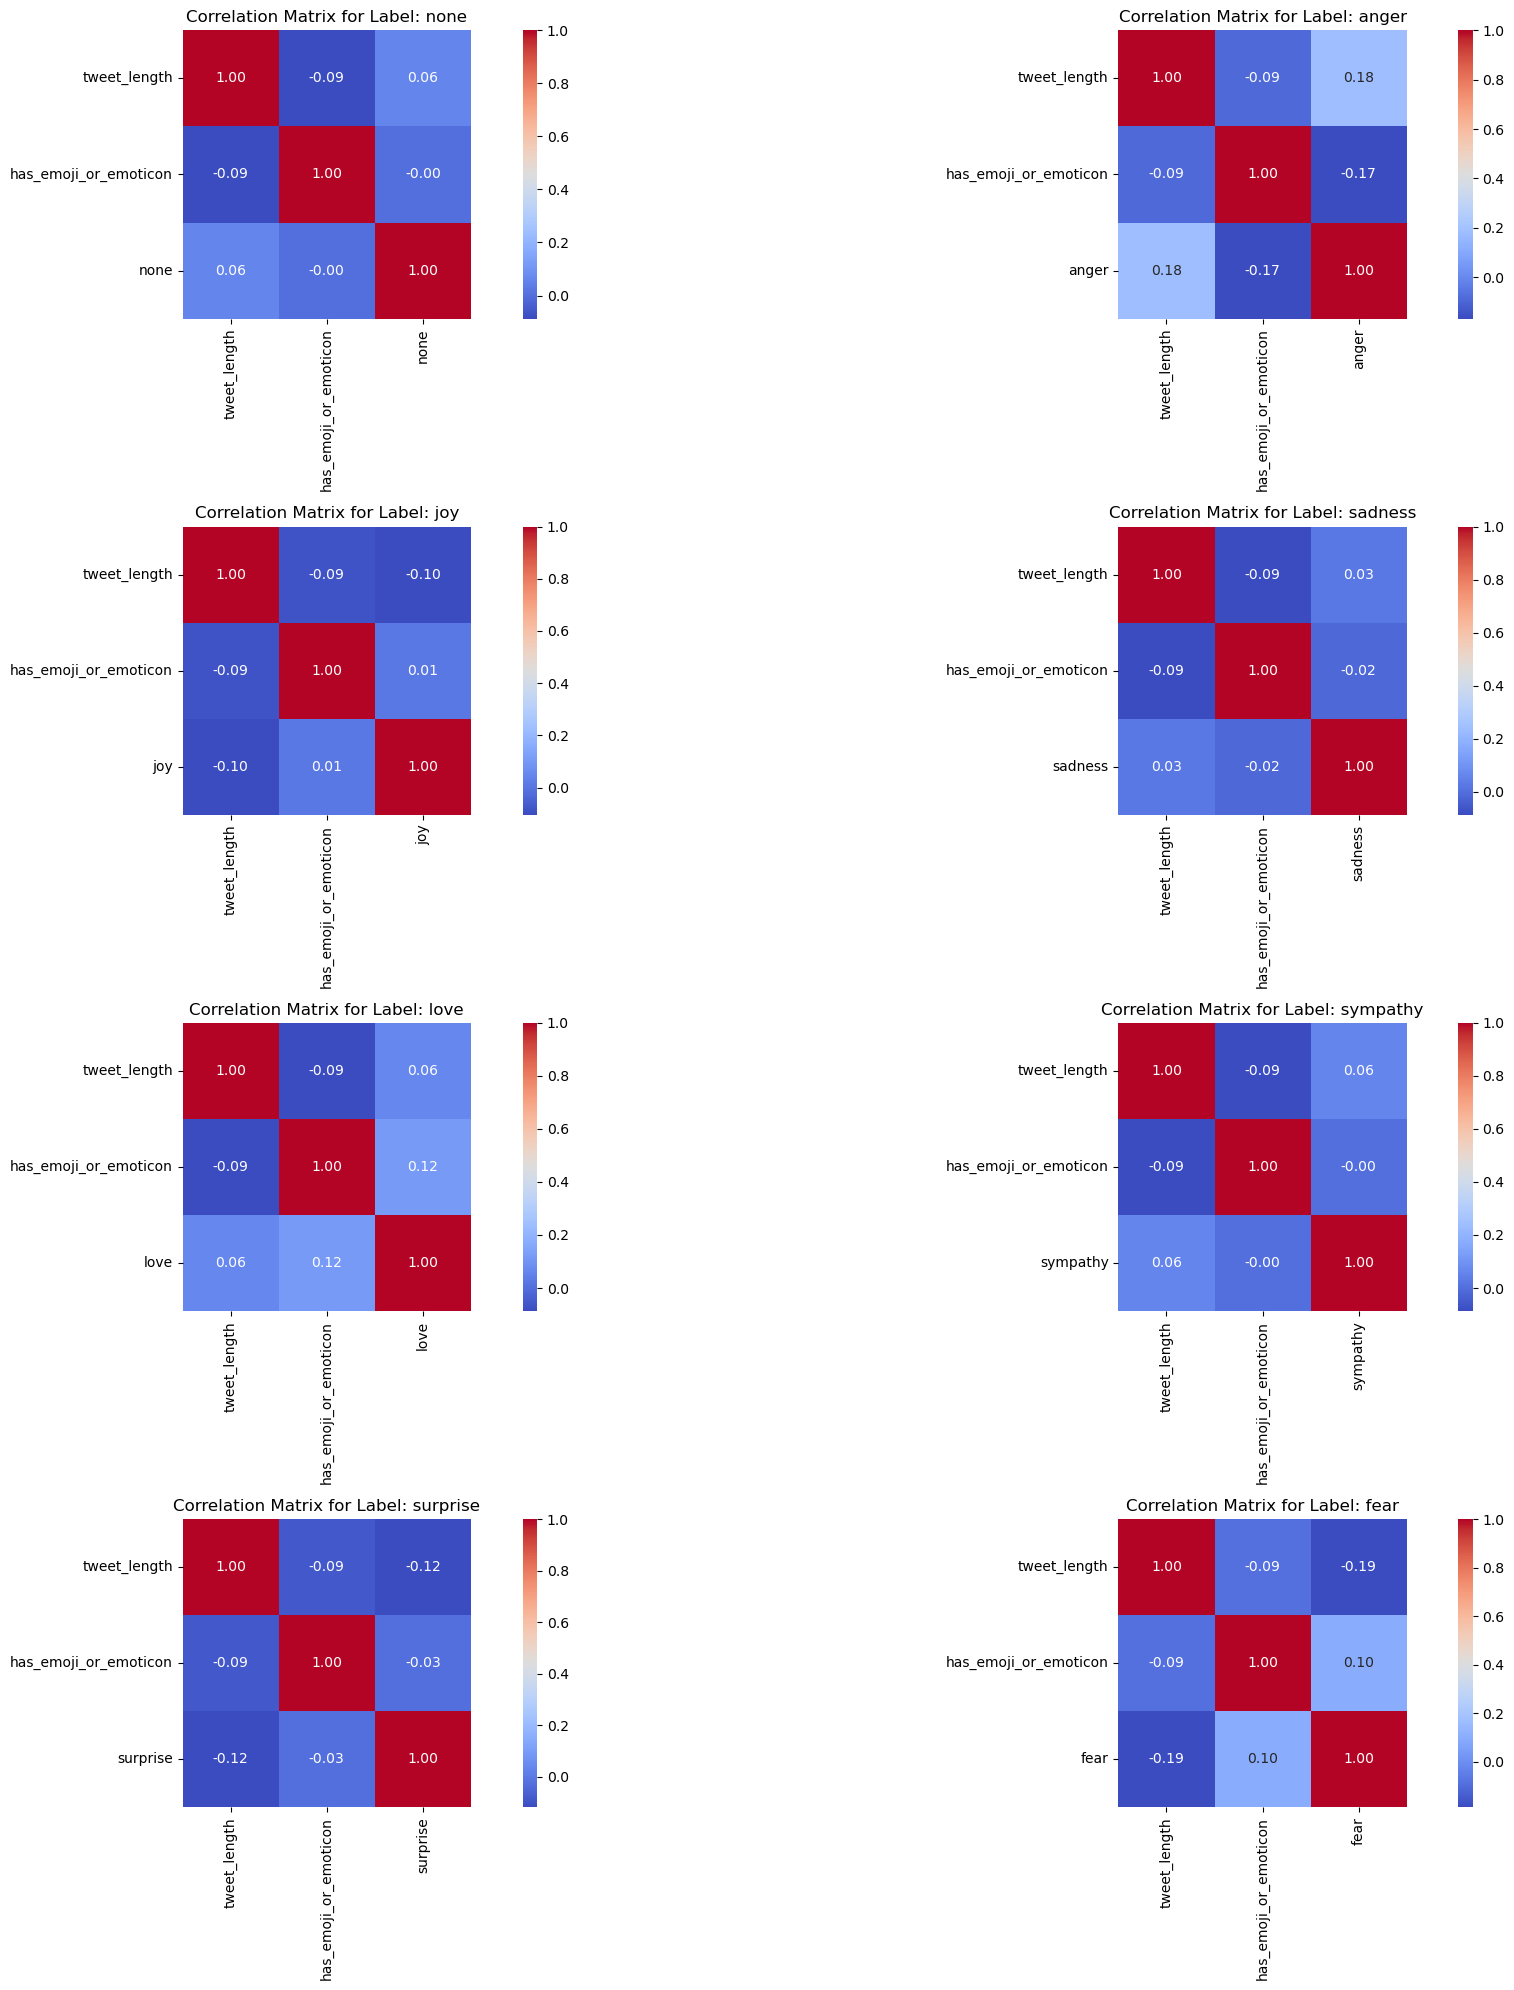

In [ ]:
label_to_class = {
    'label_0': 'none',
    'label_1': 'anger',
    'label_2': 'joy',
    'label_3': 'sadness',
    'label_4': 'love',
    'label_5': 'sympathy',
    'label_6': 'surprise',
    'label_7': 'fear'
}
df_encoded = pd.get_dummies(df, columns=['label'], prefix='label')
df_encoded.rename(columns=label_to_class, inplace=True)


# Create a list of selected columns for each label
label_columns = ['none', 'anger', 'joy', 'sadness', 'love', 'sympathy', 'surprise', 'fear']

# Get non-empty label columns
non_empty_label_columns = [label_column for label_column in label_columns if df_encoded[label_column].sum() > 0]

# Calculate the number of subplots needed
num_subplots = len(non_empty_label_columns)
# Plot the correlation matrices for each non-empty label in a 4x2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

for i, label_column in enumerate(non_empty_label_columns):
    selected_columns = ['tweet_length', 'has_emoji_or_emoticon', label_column]
    correlation_matrix = df_encoded[selected_columns].corr()
    ax = axes[i // 2, i % 2]
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, ax=ax)
    ax.set_title(f"Correlation Matrix for Label: {label_column}")

# Clear any empty subplots
for i in range(num_subplots, 8):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()